In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mglearn
sns.set(rc={'figure.figsize': (20, 10)})

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


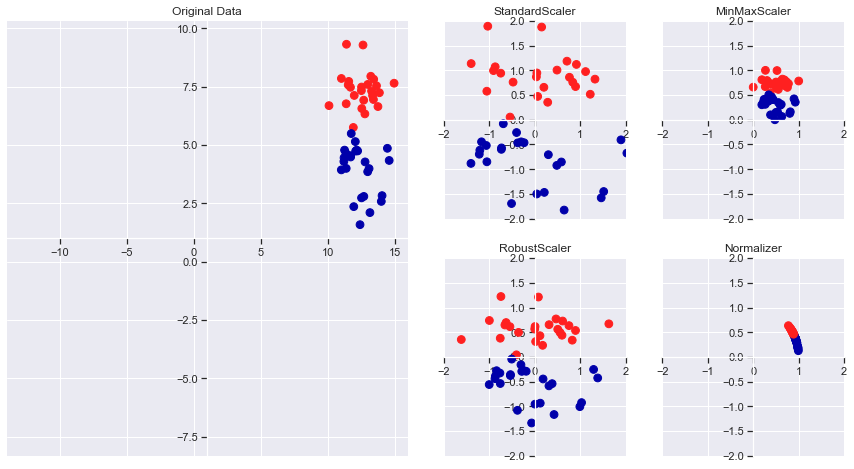

In [36]:
mglearn.plots.plot_scaling()

# Применение преобразованных данных


In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [38]:
cancer = load_breast_cancer()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=1)

In [40]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(X_train)

MinMaxScaler()

In [44]:
X_train_scaled = scaler.transform(X_train)

In [45]:
X_train.min(axis=0)

array([6.981e+00, 1.038e+01, 4.379e+01, 1.435e+02, 5.263e-02, 2.650e-02,
       0.000e+00, 0.000e+00, 1.167e-01, 5.025e-02, 1.144e-01, 3.602e-01,
       7.570e-01, 6.802e+00, 2.667e-03, 3.746e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 9.502e-04, 7.930e+00, 1.249e+01, 5.041e+01, 1.852e+02,
       8.409e-02, 4.327e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [46]:
X_train_scaled.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
X_test_scaled = scaler.transform(X_test)

# Влияние предобработки на модель 


In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [50]:
scaler = StandardScaler()
svm = SVC(C=100).fit(X_train, y_train)

In [51]:
svm.score(X_test, y_test)

0.9090909090909091

In [52]:
scaler.fit(X_train)

StandardScaler()

In [53]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
svm.fit(X_train_scaled,y_train)

SVC(C=100)

In [55]:
svm.score(X_test_scaled, y_test)

0.9370629370629371

#    Снижение размерности, выделение признаков и множественное обучение

## Анализ главных компонент PCA

<Figure size 1440x1440 with 0 Axes>

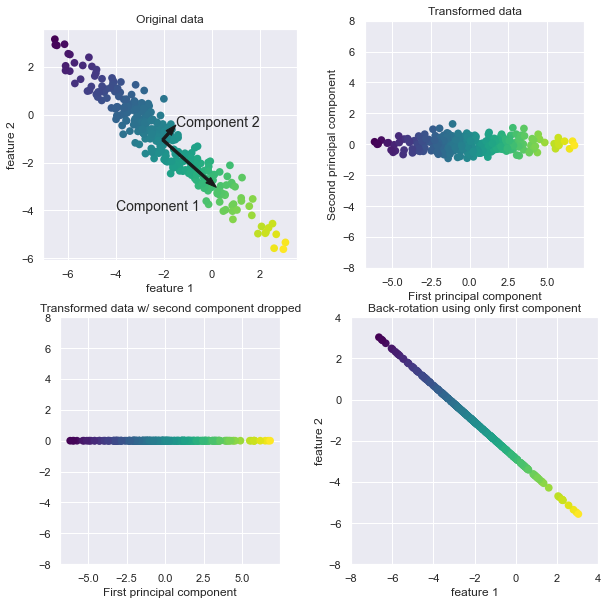

In [56]:
sns.set(rc={'figure.figsize': (20 ,20)})
plt.figure(figsize=(20 ,20))
mglearn.plots.plot_pca_illustration()

In [57]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


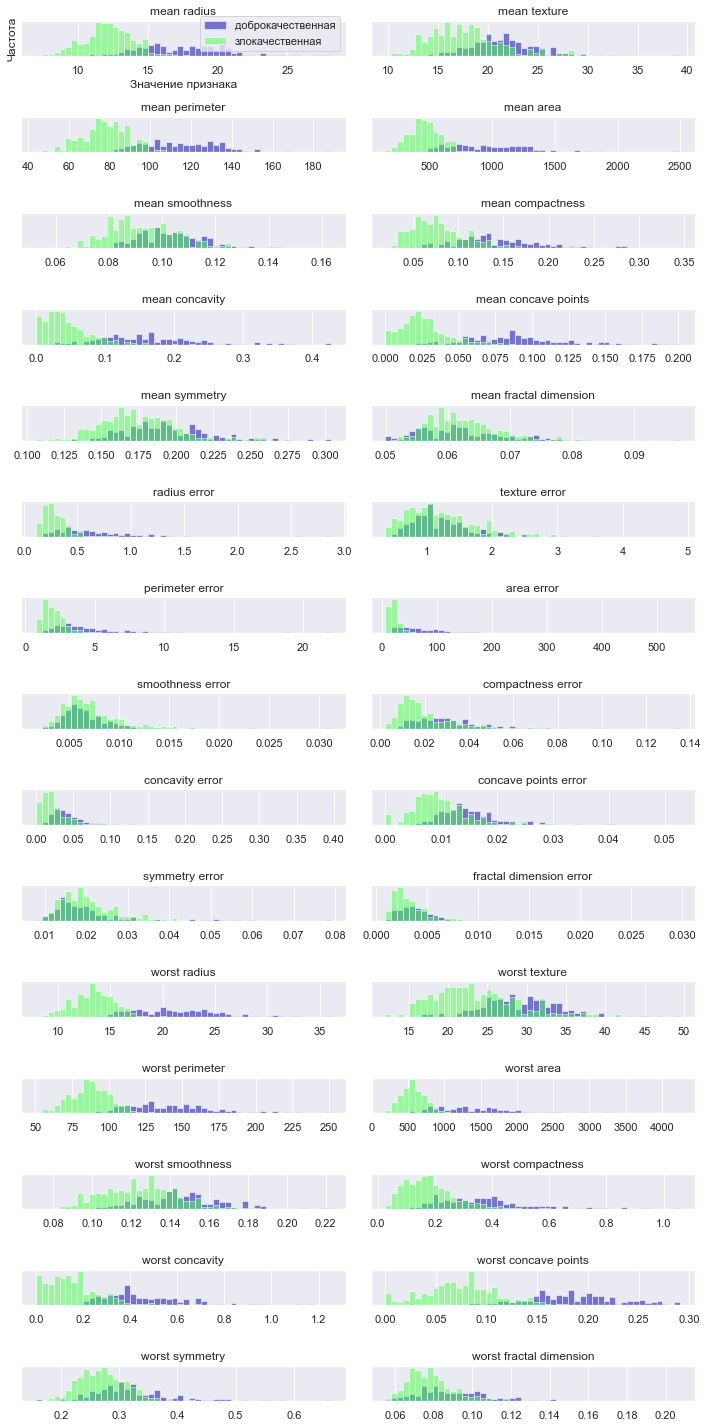

In [58]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
ax[0].legend(["доброкачественная", "злокачественная"], loc="best")
fig.tight_layout()

In [59]:
X = df_cancer.drop('target', axis=1)

In [60]:
y = df_cancer.target

In [61]:
scaler = StandardScaler()

In [62]:
X_scaled = scaler.fit_transform(X)

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=2)

In [65]:
pca.fit(X_scaled)

PCA(n_components=2)

In [66]:
X_pca = pca.transform(X_scaled)

<AxesSubplot:>

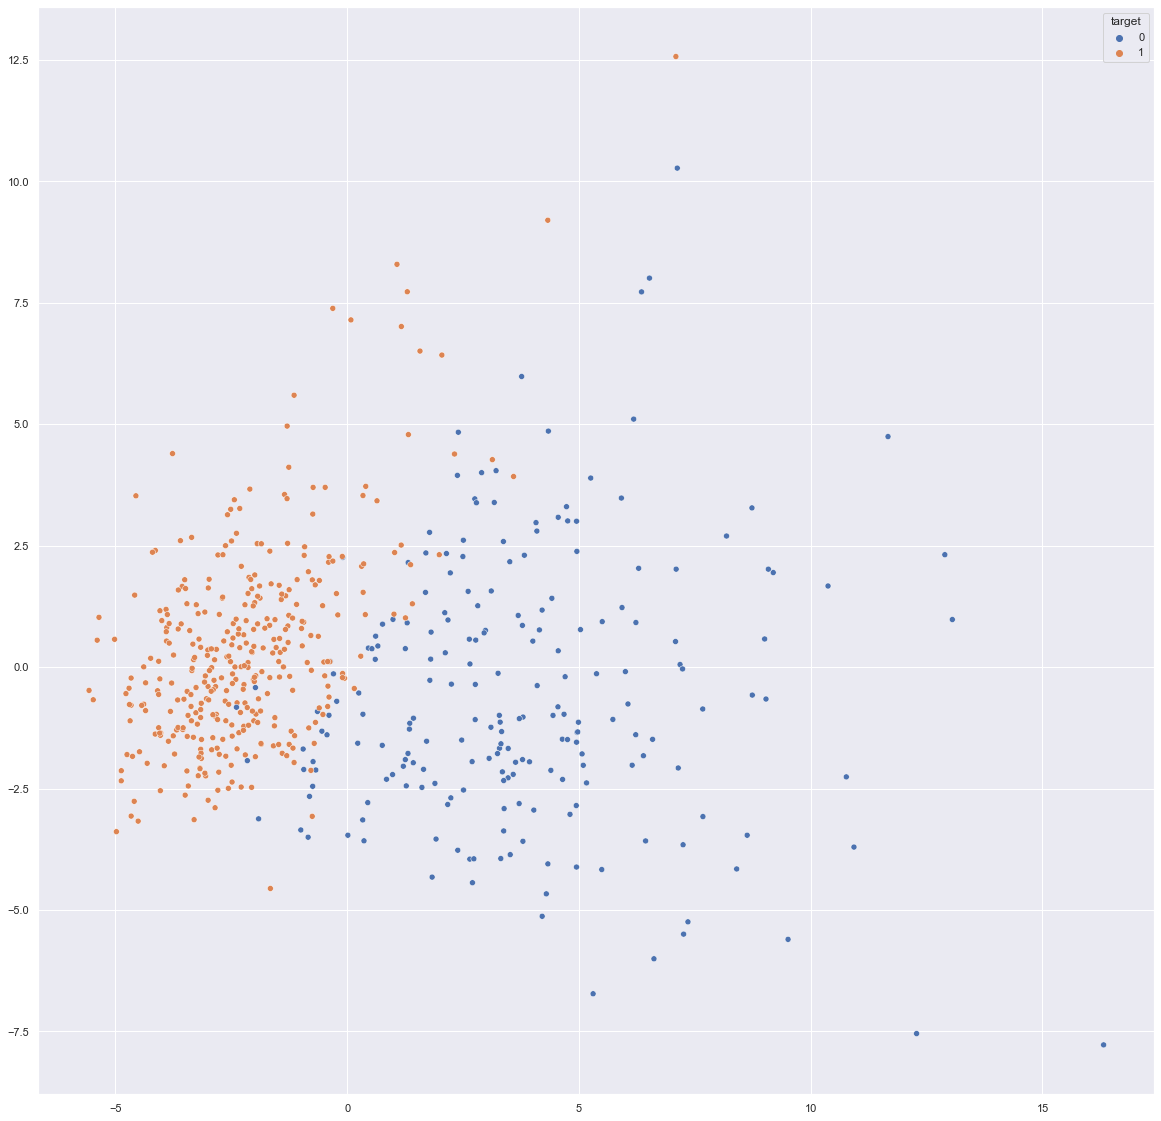

In [67]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)

## Метод собственных лиц

In [68]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

OSError: [Errno 28] No space left on device: '/Users/mseastar/scikit_learn_data/lfw_home/lfw_funneled'

In [69]:
pd.Series([people.target, people.target_names])

NameError: name 'people' is not defined

In [70]:
X = people.data

NameError: name 'people' is not defined

In [71]:
y = people.target

NameError: name 'people' is not defined

In [72]:
df_people = pd.DataFrame(X)

In [73]:
df_people['name'] = y

In [74]:
df_people.name

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: name, Length: 569, dtype: int64

In [75]:
df_people.name = df_people.name.apply(lambda x: people.target_names[x]) 

NameError: name 'people' is not defined

In [ ]:
df_people

# Факторизация неотрицательных матриц NMF

In [76]:
from sklearn.decomposition import NMF

In [77]:
nmf = NMF(n_components=15)

In [78]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


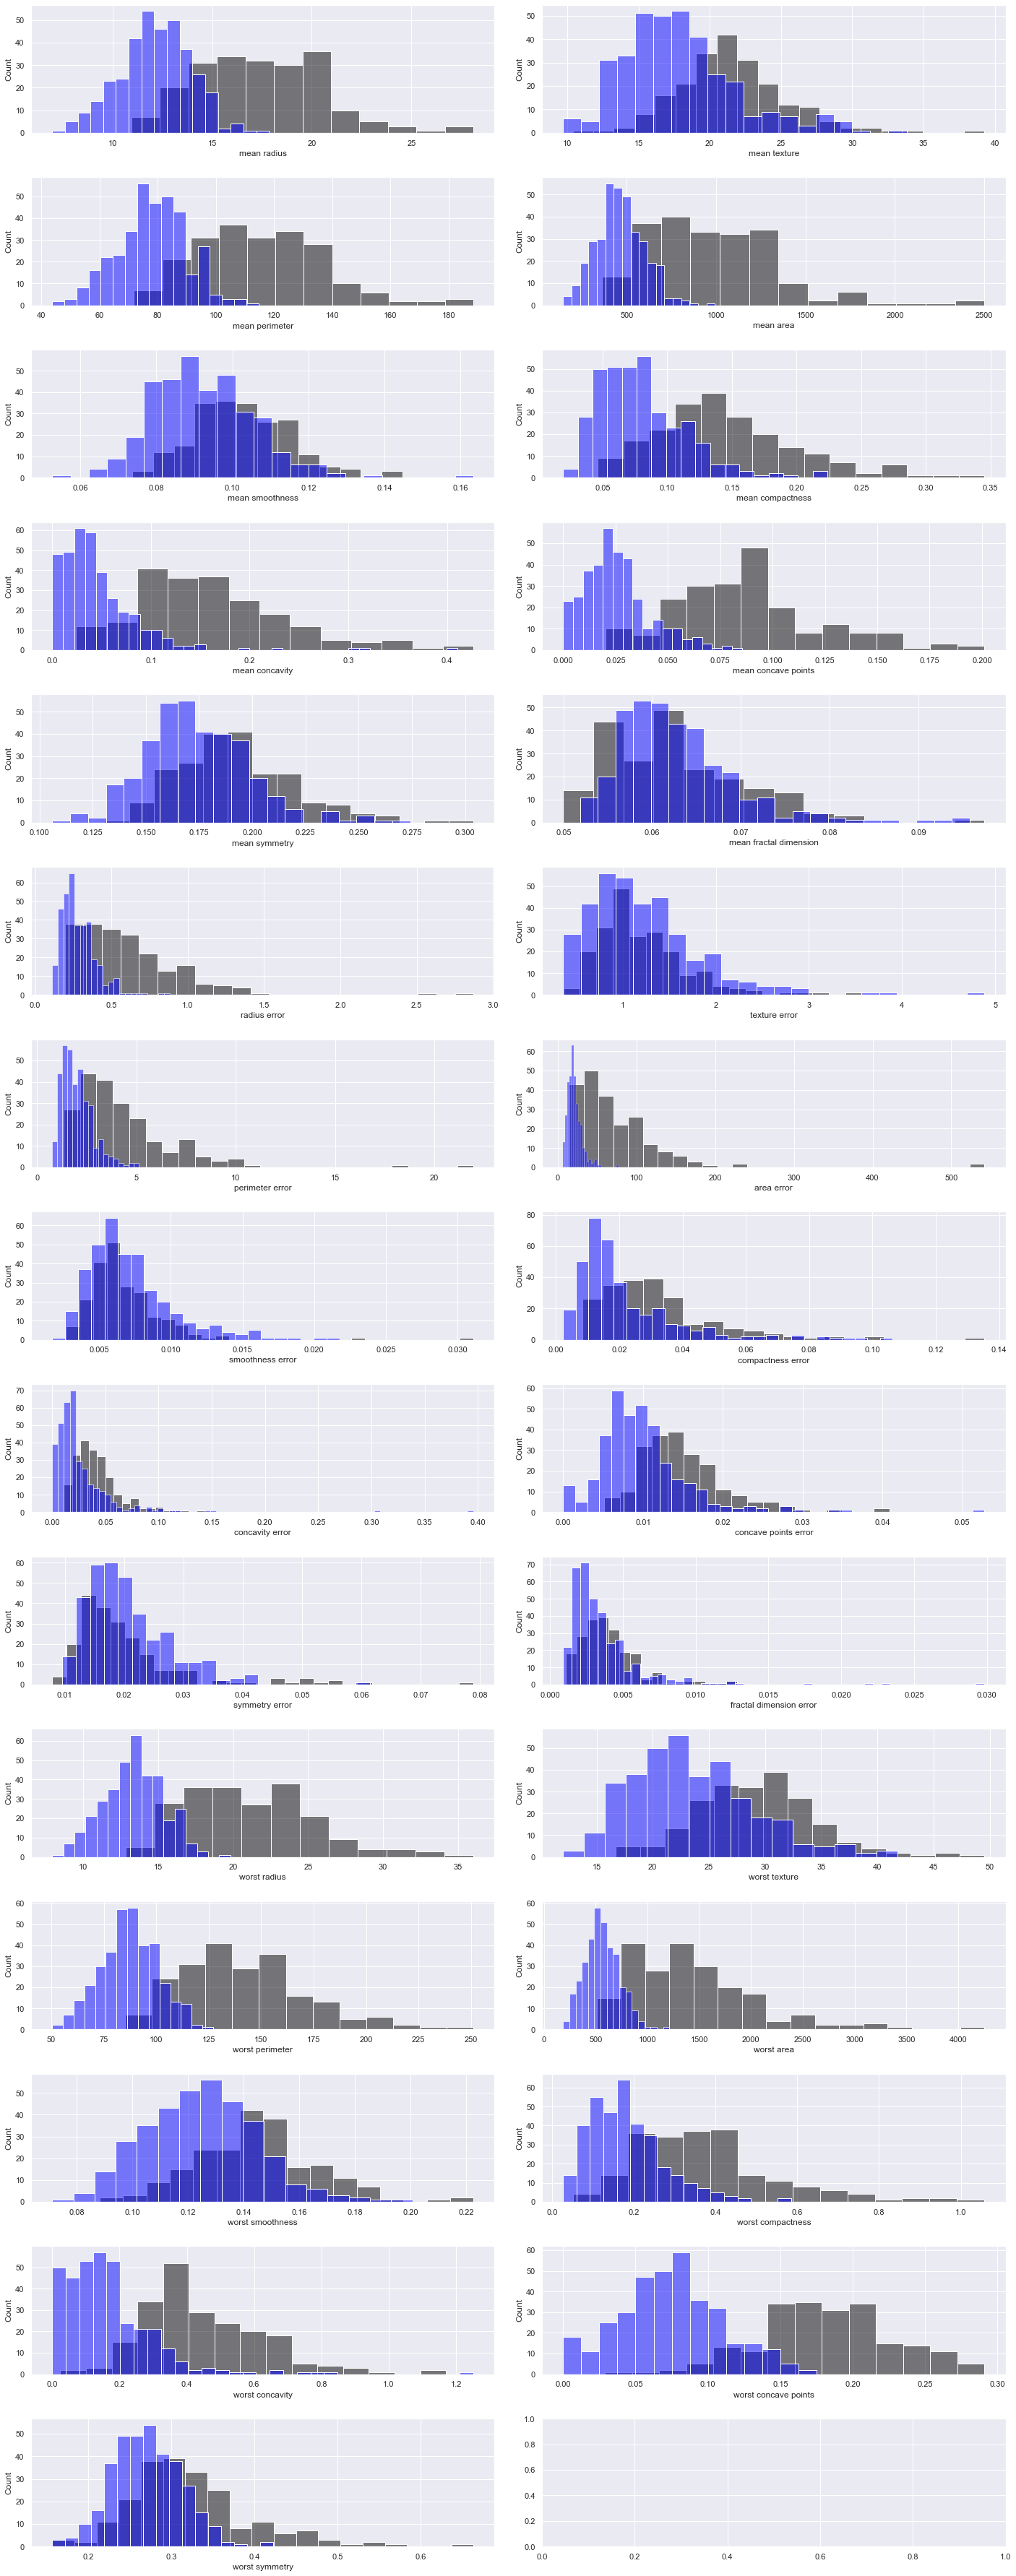

In [79]:
fig, axs = plt.subplots(ncols=2, nrows=15, figsize=(20, 50))
axs = axs.flatten()
index = 0
for i in df_cancer.columns:
    if index == 29:
        break
    sns.histplot(data=df_cancer[i][df_cancer.target == 0], ax=axs[index], color='black', alpha=0.5)
    sns.histplot(data=df_cancer[i][df_cancer.target == 1], ax=axs[index], color='blue', alpha=0.5)
    index += 1
fig.tight_layout(pad=2)

Алгоритм t-SNE имеет некоторые настраиваемые параметры, хотя, как
правило, дает хорошее качество, когда используются настройки по
умолчанию. Вы можете поэкспериментировать с параметрами perplexity
и early_exaggeration, но эффекты от их применения обычно
незначительны.

# t-SNE метод

In [80]:
from sklearn.datasets import load_digits

In [83]:
digits = load_digits()

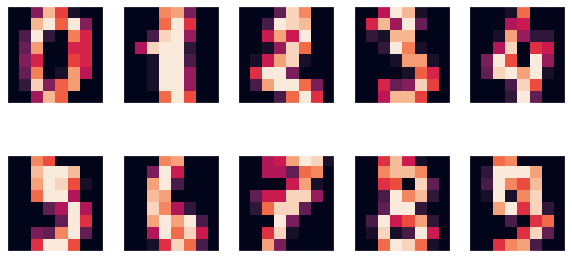

In [84]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Вторая главная компонента')

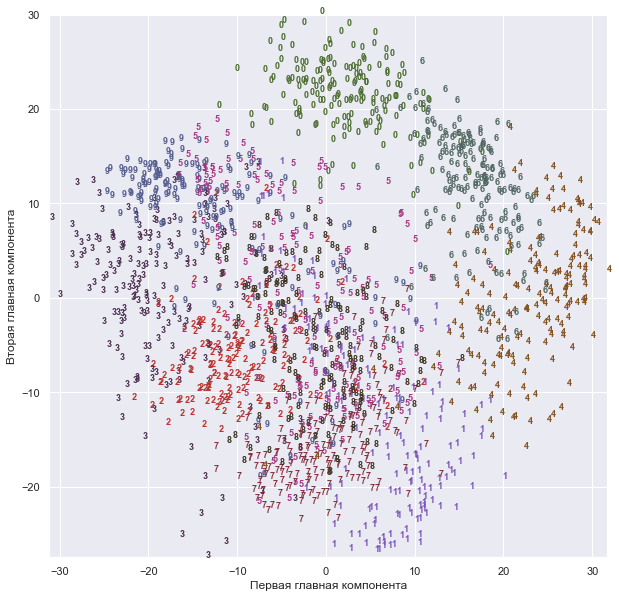

In [85]:
pca = PCA(n_components=2)
pca.fit(digits.data)
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # строим график, где цифры представлены символами вместо точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0, 't-SNE признак 1')

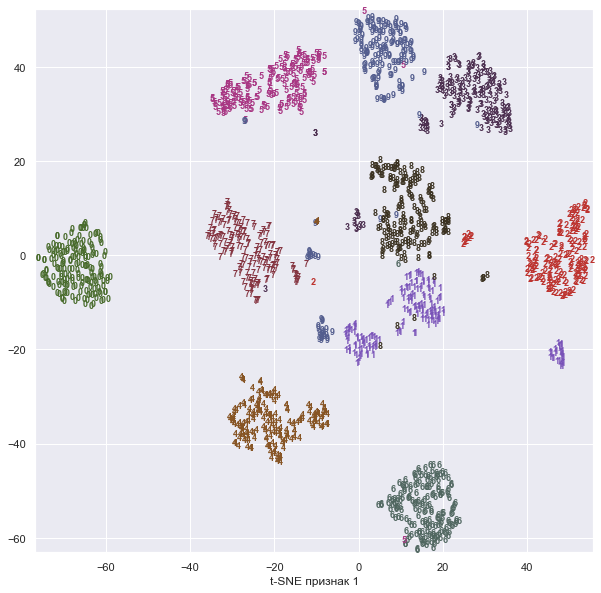

In [86]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# используем метод fit_transform вместо fit, т.к. класс TSNE не использует метод transform
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # строим график, где цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1")

# Clustering

## Кластеризация k-means


In [88]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Агломеративная класстеризация

In [93]:
from sklearn.cluster import AgglomerativeClustering

In [94]:
ac = AgglomerativeClustering()

# Дендрограмма

Text(0, 0.5, 'Кластерное расстояние')

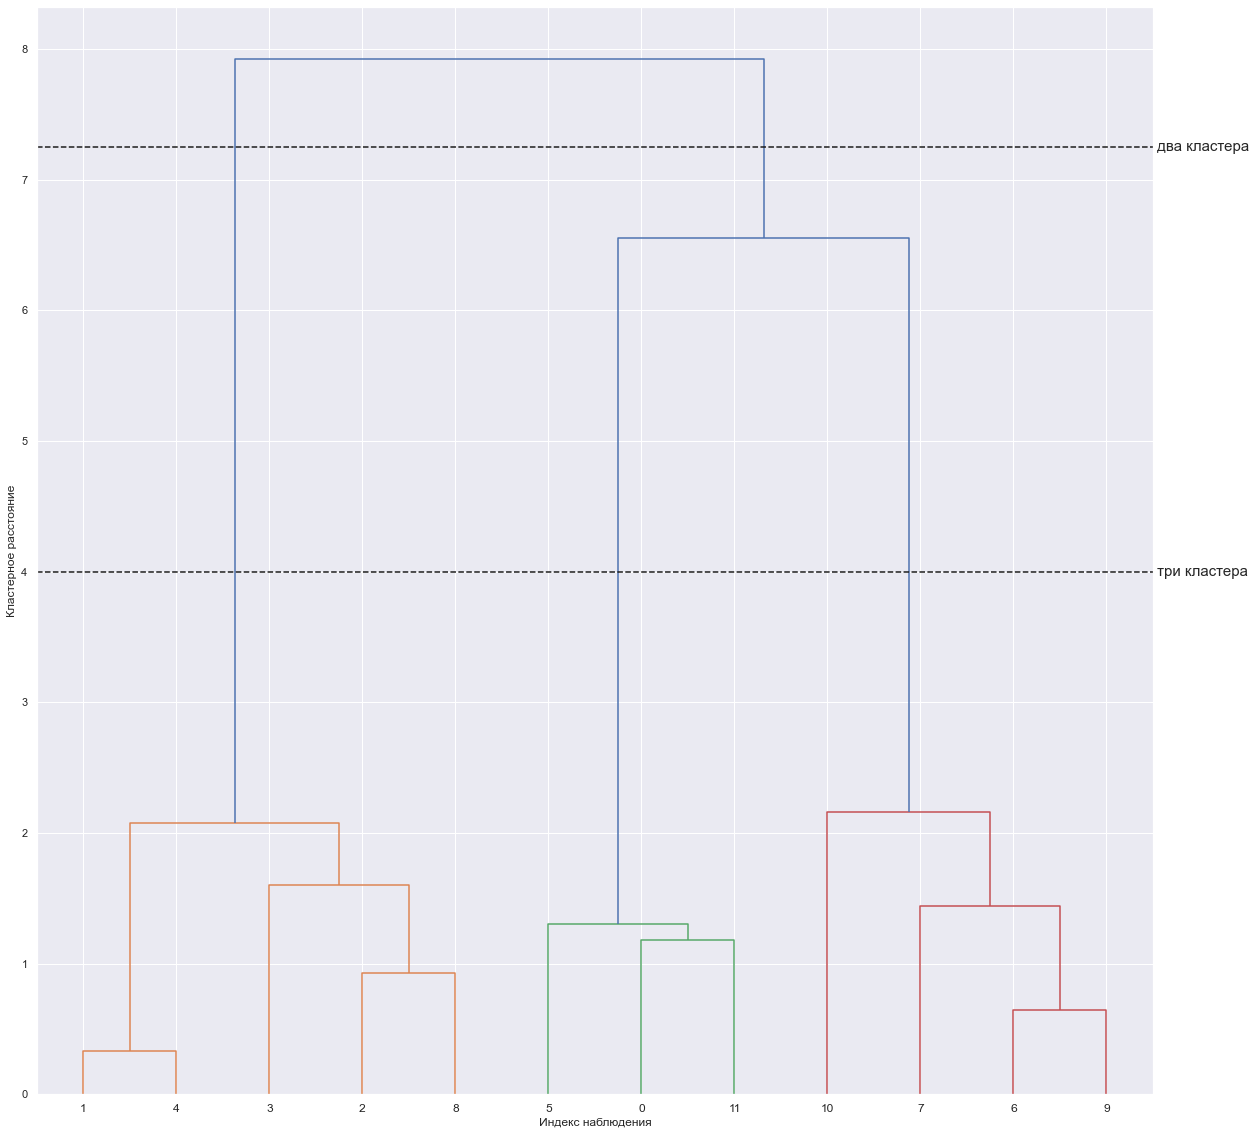

In [89]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# применяем кластеризацию ward к массиву данных X
# функция SciPy ward возвращает массив с расстояниями
# вычисленными в ходе выполнения агломеративной кластеризации
linkage_array = ward(X)
203
# теперь строим дендрограмму для массива связей, содержащего расстояния
# между кластерами
dendrogram(linkage_array)
# делаем отметки на дереве, соответствующие двум или трем кластерам
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' два кластера', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' три кластера', va='center', fontdict={'size': 15})
plt.xlabel("Индекс наблюдения")
plt.ylabel("Кластерное расстояние")

# DBSCAN

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


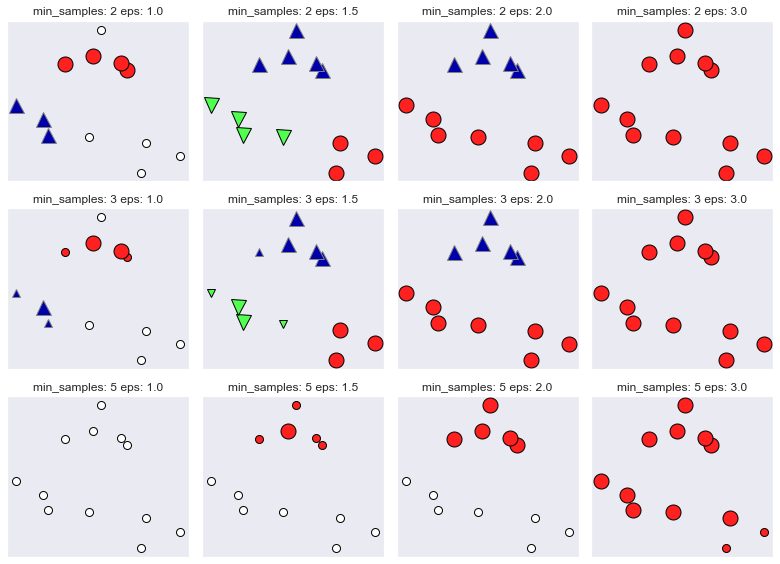

In [90]:
mglearn.plots.plot_dbscan()

# Оценка качества класстеризации

Наиболее важными
среди них являются скорректированный коэффициент Рэнда (adjusted
Rand index, ARI) и нормализованная взаимная информация (normalized
mutual information, NMI), которые представляют собой количественные
показатели. Они принимают значения, близкие к 0, при случайном
назначении кластеров, и значение 1, когда полученные результаты
кластеризации полностью совпадают с фактическими

### adjusted_rand_score(clusters1, clusters2)

Чуть более
лучшая стратегия для оценки результатов кластеризации заключается в
использовании метрик кластеризации на основе робастности (robustnessbased clustering metrics).

# Выводы по класстеризации :

    Каждый из алгоритмов имеет свои преимущества.
    Алгоритм kсредних позволяет описывать кластеры с помощью их средних значений. Кроме того, его можно рассматривать как декомпозиционный метод, в котором каждая точка данных представлена центром кластера. 
    
    DBSCAN позволяет определить «шумовые точки», которые не присвоены ниодному кластеру, и он может помочь автоматически определить количество кластеров. В отличие от двух остальных методов он допускает наличие кластеров сложной формы, как мы уже видели на примере набора данных two_moons. Иногда DBSCAN выделяет кластеры, сильно отличающиеся по своим размерам, что может быть как недостатком, так и преимуществом этого алгоритма. 
    
    Агломеративная кластеризация позволяет построить исчерпывающую иерархию возможных разбиений данных, которую можно легко исследовать с помощью дендрограмм.